### Explorando Machine Learning na reconstrução da taxa de expansão do Universo, $H(z)$.

O objetivo deste trabalho é estudar diferentes abordagens na reconstrução de $H(z)$, utilizando dados de cronômetros cósmicos, por meio de Processos Gaussianos e MCMC (Monte Carlo-Markov Chain).

#### Um pouco de Cosmologia
As 3 equações que governam a dinâmica cósmica são chamadas de **Equações de Friedmann**. Neste trabalho, focaremos nossos esforços somente na 1ª Equação,
$$
H_{t}^{2} = \frac{8}{3} \pi G \rho_{t} - \frac{K}{a_{t}^{2}}.
$$
Essa expressão relaciona a expansão do universo com a energia responsável por essa expansão/contração.

Realizando uma mudança de variável $t \to z$ ($z$ é o [*redshift*](https://pt.wikipedia.org/wiki/Desvio_para_o_vermelho)), e aplicando as premissas do modelo cosmológico padrão, $\Lambda CDM$, podemos reescrever a equação como
$$
H(z) = H_{0} \sqrt{\Omega_{m}(1+z)^{3}+(1-\Omega_{m})}.
$$

Observações da matéria e da energia escura, nos levam a valores médios aproximados da constante de Hubble,  $H_{0} = 70 \ km \cdot s^{-1} \cdot Mpc^{-1}$, e da densidade de matéria do universo, $\Omega_{m} = 0.3$ (sim, é adimensional). Dessa forma,

$$
H_{\Lambda CDM} = 70 \sqrt{0.3(1+z)^{3}+0.7)}.
$$

Você pode estar se perguntando: **se já sabemos a expressão que modela $H(z)$, pra que reconstuir?** Bom, te respondo com outra pergunta: e se o modelo teórico-observacional estiver errado? A vantagem de reconstruir com métodos não paramétricos, é que essa abordagem é bem flexível e se adapta muito bem aos dados. Além disso, ela não precisa pressupor uma relação entre os dados. Em adição, ao utilizar dados de cronômetros cósmicos, que são ṕuramente observacionais e independente de modelo, conseguimos gerar uma reconstrução *fair*. Porém, como veremos adiante, o Processo Gaussiano aceita que eu passe $H_{\Lambda CDM}$ como um *ansatz* para função média que descreva os dados, $\mu$. Um dos nossos objetivos é explorar a diferença no resultado ao considerar $\mu = 0$ e $\mu = H_{\Lambda CDM}$.


#### Processos Gaussianos
Um Processo Gaussiano **é uma ferramenta de machine learning que pode ser utilizada para reconstruir, de maneira não paramétrica, uma função que descreva um conjunto de dados**. De maneira um pouco mais aprofundada, esse instrumento utiliza **inferência Bayesiana para construir uma distribuição multivariada no espaço de funções**.

Para realizar a regressão (ou reconstrução), o processo necessita de algumas coisas:
* Dados de entrada, $(X, Y)$;
* Um _ansatz_ para função média que descreva os dados, $\mu (x)$;
* Uma função de covariância, também chamada de kernel, $k(x, \bar{x})$.

A função $k(x, \bar{x})$ depende, por sua vez, de alguns hiperparâmetros que variam dependendo da escolha da função. Neste trabalho, vamos utilizar a função _squared exponential_:

$$
k(x, \bar{x}) = \sigma^{2}_{f}\exp \Bigg( - \frac{(x-\bar{x})^{2}}{2l^{2}}\Bigg).
$$

Essa função depende dos hiperparâmetros $\sigma$ e $l$.

Dessa forma, podemos descrever nossos dados como:

$$
f(x) \sim \mathcal{GP}(\mu(x), \ k(x, \ \bar{x})).
$$

Adentrando um pouco mais na matemática, nosso problema se resume (para mais detalhes vide as referências) a calcular

 $$p(f^{*}|y) = \frac{p(y,f^{*})}{p(y)}$$
$$=\frac{1}{(2\pi)^{n^{*}/2}\sqrt{det(A)}} exp\left( -\frac{1}{2} [(f^{*}-\bar{f^{*}})^{T} cov(f^{*})^{-1} (f^{*}-\bar{f^{*}})\right)$$ 
$$= \mathcal{N}(\bar{f^{*}}, cov(f^{*})),$$

onde
    $$\bar{f^{*}} = \mu^{*}+K^{*T}\bar{K}^{-1}(y-\mu)$$
e
    $$cov(f^{*}) = K^{**}-K^{*T}\bar{K}^{-1}K^{*}$$.

Vemos então a dependência que a função média da nossa reconstrução, $\bar{f^{*}}$, tem da função média *prior*, $\mu$. Ou seja, o valor de $\mu$ influencia diretamente nossa reconstrução.

#### O Problema
Esse procedimento vem sido utilizado durante décadas para reconstrução de diferentes observáveis cosmológicos. Porém, até o momento, poucos pesquisadores exploraram o impacto da seleção da função média, $\mu(x)$, e da escolha dos hiperparâmetros de $k$, no resultado final da regressão. 

Acontece que $\mu(x)$, como veremos adiante, influencia o resultado do processo. Uma escolha errada desse parâmetro pode induzir um viés na reconstrução. Além disso, uma má seleção de hiperparâmetros para $k(x, \bar{x})$ pode resultar em uma função de covariância imprópria. 

Então, o nosso trabalho aqui é explorar as diferenças nos resultados ao utilizar diferentes abordagens de reconstrução.

**Em uma abordagem totalmente Bayesiana, os hiperparêmtros de $k(x, \bar{x})$ são obtidos através de uma *marginalização* ao explorar a função de verossimilhança (likelihood).** Porém, em alguns casos, podemos maximizar essa função ao invés de explorá-la. Para marginalizar, utilizamos um algoritmo de **Monte Carlo-Markov Chain** (MCMC).

#### Nossa metodologia

Então faremos 4 reconstruções, com abordagens diferentes para $\mu$, $\sigma$ e $l$, para entender como esses parâmetros influenciam o resultado final da regressão. Para isso, reconstruiremos a taxa de expansão do universo, $H(z)$, utilizando dados de *cronômetros cósmicos*. Em algumas dessas reconstruções utilizaremos $\mu = 0$ e em outras utilizaremos $\mu = H_{\Lambda CDM}$ (modelo cosmológico padrão).
Além disso, em algumas abordagens **maximizaremos** a função de verossimilhança, para obter $\sigma$ e $l$, e em outras, **marginalizaremos** esses hiperparâmetros. Em resumo:

1. Reconstruiremos $H(z)$ utilizando $\mu = 0$ e **maximizando** os hiperparêmtros;
2. reconstruiremos $H(z)$ utilizando $\mu = H_{\Lambda CDM}$ e **maximizando** os hiperparêmtros;
3. reconstruiremos $H(z)$ utilizando $\mu = 0$ e **marginalizando** os hiperparêmtros;
4. reconstruiremos $H(z)$ utilizando $\mu = H_{\Lambda CDM}$ e **marginalizando** os hiperparêmtros.

#### Referências

As principais referências deste trabalho são:

1. [Hwang, 2023] S. Hwang, B. L’Huillier, R. E Keeley, Jee. M. J., and A. Shafieloo. **How to use gp: Effects of the mean function and hyperparameter selection on gaussian process regression.**
Journal of Cosmology and Astroparticle Physics, page 14, 2023.

2. [Gonzalez, 2018] Gonzalez. **Reconstrução Não Paramétrica das Perturbações Cosmologicas.** PhD thesis, Observatório Nacional, Rio de Janeiro, Brasil, 2018.

3. [Seikel, 2012] M. Seikel, C. Clarkson, and M. Smith. **Reconstruction of dark energy and expansion dynamics using gaussian processes.** Journal of Cosmology and Astroparticle Physics,
6:36–47, 2012.

4. [Gilks, 1996] W. R. Gilks, S. Richardson, and D. J. Spiegelhalter. **Markov Chain Monte Carlo in Practice.** Springer, 1 edition, 1996.

#### Sumário
1. [Reconstrução com $\mu=0$ e otimizando os Hiperparâmetros](#rec1)
2. [Reconstrução com $\mu = H_{\Lambda CDM}$ e otimizando os Hiperparâmetros](#rec2)
3. [Reconstrução com $\mu=0$ e marginalizando os Hiperparâmetros](#rec3)
   1. [MCMC](#mcmc1)
   2. [Reconstrução](#final_rec1)
4. [Reconstrução com $\mu = H_{\Lambda CDM}$ e marginalizando os Hiperparâmetros](#rec4)
   1. [MCMC](#mcmc2)
   2. [Reconstrução](#final_rec2)
5. [Conclusão](#conclusao)

## Pre code

In [1]:
from gapp import dgp
from getdist import plots, MCSamples
import numpy as np
from numpy import loadtxt, savetxt
import random
import emcee
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from typing import List, Tuple
import pandas as pd

### Funções Gerais

In [2]:
def plot(X: List[float], Y: List[float], Sigma: List[float], rec: List[List[float]], r_squared: float, title: str) -> None:
    x = np.linspace(0,2.5,1000)
    y = 70*np.sqrt(0.3*(1+x)**3+0.7)

    plt.xlim(0, 2.5)
    plt.fill_between(rec[:, 0], rec[:, 1] + rec[:, 2], rec[:, 1] - rec[:, 2],
                     facecolor='lightblue')
    plt.plot(rec[:, 0], rec[:, 1], label=f'Reconstrução - (R²: {r_squared:.2f})')
    plt.plot(x,y, linestyle="dashed", label="LCDM", color="black")
    plt.errorbar(X, Y, Sigma, color='red', fmt='_', label="Observações")
    plt.legend()
    plt.xlabel('z')
    plt.ylabel('H(z)')
    
    plt.savefig(f'{title}')

In [3]:
def plot_triangle(samples: List[List[float]]) -> None:
    names1 = ['\sigma','l']
    labels1 =  names1#['\Omega_m','w_b','b','H_0']
    nomearq="mtrN"

    mult_order=2

    samples = MCSamples(samples = samples ,names = names1, labels = labels1, settings={'boundary_correction_order':1, 
	                          'mult_bias_correction_order':1,'ignore_rows':0.4})

    name='samples2_PAN_LCDM'
    g = plots.get_subplot_plotter()
    g.triangle_plot([samples],names1,filled=True)
    g.export('triangle'+name+'.pdf')

In [4]:
def find_regression_values(x_input: List[float], x_model: List[float]) -> List[float]:
    values:List[float] = []
    
    for value_input in x_input:
        value_ = min(x_model, key=lambda x: abs(x - value_input))
        values.append(value_)
    return values
    
assert find_regression_values(
    [1,2.5,3.6,4,5,10.2,2.5,4,60.5, 78, 90.4], 
    [1.9,2,3.7,4.3,5.1,10,2.5]
) == [1.9, 2.5, 3.7, 3.7, 5.1, 10, 2.5, 3.7, 10, 10, 10], 'The function is not finding the list with the correct values.'

In [5]:
def calculate_r_squared(actual: Tuple[List[float]], prediction: List[List[float]]) -> float:
    x_actual = actual[0] 
    y_actual = actual[1]

    x_rec = prediction[:,0]
    y_rec = prediction[:,1]
    
    x_rec_values = find_regression_values(x_actual, x_rec)
    y_rec_values = [y_rec[x_rec.tolist().index(i)] for i in x_rec_values]

    r_squared = r2_score(y_actual, y_rec_values)
    
    return r_squared

assert calculate_r_squared((np.array([1,2,3,4,5,6,7,8]), np.array([2, 4, 5, 4, 5, 7, 8, 9])), 
np.array([
    [1, 1.5], 
    [2, 3.5], 
    [3, 5],
    [4 ,4.5], 
    [5 ,5.5],
    [6, 6.5], 
    [7, 8], 
    [8, 9]
])) == 0.9671052631578947, 'The function is not calculating the R squared.'

In [6]:
def make_vector(dim: List[float], vec_inicial: List[float]) -> List[float]:
    vec=np.zeros([1,len(dim)],dtype=np.float32)
    for a in range(len(dim)):
        vec[0,a]=vec_inicial[a]
    return vec

In [7]:
def lambda_cdm(z: float) -> float:
    H_0 = 70
    matter_density = 0.3
    
    return H_0*np.sqrt(matter_density*(1+z)**3+(1-matter_density))

In [8]:
def zero(z: float) -> int:
    return 0

### Inicializando Parâmetros

#### Para o Processo Gaussiano

In [9]:
(X, Y, Sigma) = loadtxt("./inputdata.txt", unpack='True')    
xmin, xmax, nstars = (0.0,2.5, 200)
initheta = [2.0, 2.0]

#### Para o MCMC

In [10]:
data = np.loadtxt("inputdata.txt")
z, Hz, error = data[:, 0], data[:, 1], data[:, 2]
Dvec = make_vector(z, Hz)

## Code

<div id="rec1" />

### Reconstruindo utilizando $\mu = 0$ e otimizando os hiperparâmetros

Inicializamos o Processo Gaussiano, com os parâmetros inicializados anteriormente, e definimos $\mu = 0$. Logo após, reconstruímos.

In [11]:
g = dgp.DGaussianProcess(X, Y, Sigma, cXstar=(xmin, xmax, nstars), mu = zero)

In [44]:
(rec, theta) = g.gp(theta=initheta,thetatrain = 'True')
r_squared = calculate_r_squared((X,Y), rec)

  NIT   NF   F                       GTG
    0    1  1.338335208493299E+02   3.46444140E+00
    1    5  1.327274499356807E+02   5.82946916E-02
    2    7  1.326879600190878E+02   2.40308705E-02
    3   11  1.326436122013360E+02   1.12764108E-04
    4   14  1.326083503383413E+02   3.34928780E-03
    5   16  1.326032153348359E+02   9.00368708E-05
    6   18  1.326031277272611E+02   1.50479559E-06
tnc: fscale = 341.666
    7   20  1.326031264848519E+02   5.64978503E-10
    8   22  1.326031247316082E+02   3.92008398E-12
tnc: fscale = 18250.8



Optimized hyperparameters:
theta = [133.53415391   1.92461764]


tnc: |fn-fn-1] = 9.11378e-11 -> convergence
    9   24  1.326031247315171E+02   4.07400206E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)


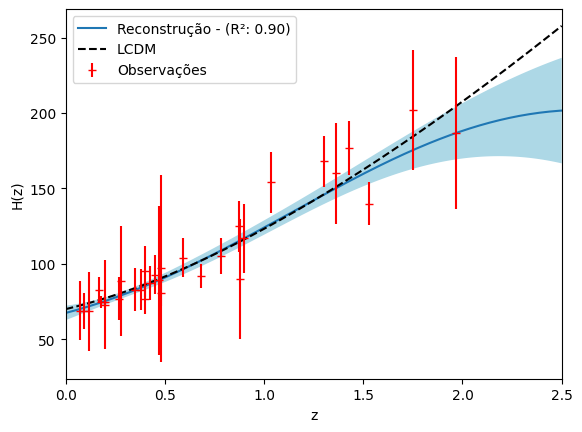

In [13]:
plot(X, Y, Sigma, rec, r_squared, title="plot1.png")

Vemos que a nossa reconstrução se adaptou bem aos dados, obtendo $R^{2} = 0.9$, e tem uma curvatura suave e fisicamente provável. Um ponto que vale a pena ressaltar é que a linha do $\Lambda CDM$ **NÃO É** nossa métrica de sucesso. Nossa regressão não precisa ser igual ao modelo cosmológico padrão (inclusive, como falei na introdução, e se o modelo padrão estiver errado? Devemos nos orientar pelos dados e não pelo modelo).

Esse gráfico representa a taxa de expansão do universo ao longo do tempo ($z$ pode ser enxergado de forma temporal e $z=0$ é o tempo atual). Vemos que hoje a taxa de expansão do universo está em, aproximadamente, $H_{0} = 70 km \ s^{-1} \ Mpc^{-1}$ e ao voltar no tempo essa taxa 

Vale a pena conferir a distribuição dos erros da reconstrução (dos desvios-padrões da regressão)

Desvio Mínimo = 2.212880984341172
Desvio Máximo = 34.98933444138175
Desvio Médio = 10.40136941272305


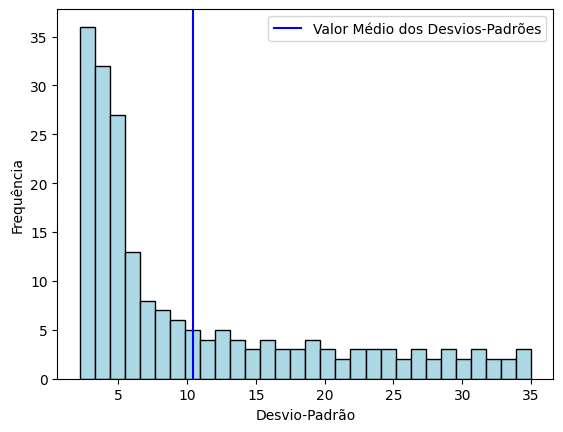

In [55]:
plt.hist(rec[:,2], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Desvio-Padrão')
plt.ylabel('Frequência')
plt.axvline(x = rec[:,2].mean(), color = 'b', label = 'Valor Médio dos Desvios-Padrões')
plt.legend()

print(f'Desvio Mínimo = {rec[:,2].min()}')
print(f'Desvio Máximo = {rec[:,2].max()}')
print(f'Desvio Médio = {rec[:,2].mean()}')

Como observamos, nossa distribuição de frequências vai de 2,2 até 35 e apresenta um valor médio de 10,4. Até agora isso não quer dizer muita coisa, iremos comparar com os outros resultados.

<div id="rec2" />

### Reconstruindo utilizando $\mu = H_{\Lambda CDM}$ e otimizando os hiperparâmetros

In [14]:
g2 = dgp.DGaussianProcess(X, Y, Sigma, cXstar=(xmin, xmax, nstars), mu = lambda_cdm)

In [15]:
(rec2, theta) = g2.gp(theta=initheta,thetatrain = 'True')
r_squared = calculate_r_squared((X,Y), rec2)

  NIT   NF   F                       GTG
    0    1  1.245030239068161E+02   3.77867051E-02
    1    3  1.242744412717579E+02   1.32957791E-65
tnc: |pg| = 3.64634e-33 -> local minimum
    1    3  1.242744412717579E+02   1.32957791E-65
tnc: Local minima reach (|pg| ~= 0)



Optimized hyperparameters:
theta = [6.6700000e-14 2.0366308e+00]


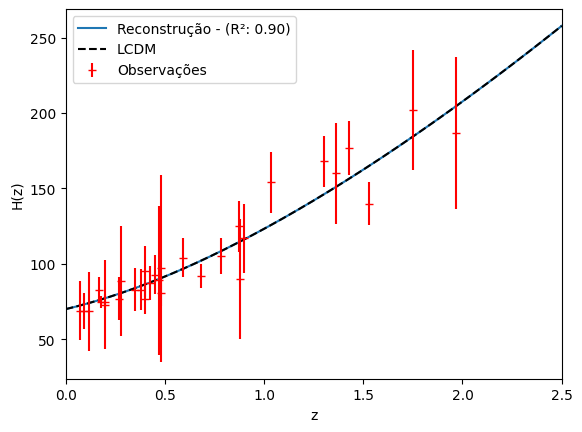

In [17]:
plot(X, Y, Sigma, rec2, r_squared, title="plot1.png")

Aqui vemos o incrível viés que é inserido no resultado ao utilizar $\mu = H_{\Lambda CDM}$. A nossa regressão é, basicamente, o próprio modelo cosmológico. Isso indica que ao invés do Processo Gaussiano se adaptar aos dados ele foi influenciado pelo modelo cosmológico. Podemos gerar o gráfico da distribuição dos desvios-padrões para ver o que acontece.

Desvio Mínimo = 6.670000000000001e-14
Desvio Máximo = 6.670000000000001e-14
Desvio Médio = 6.670000000000001e-14


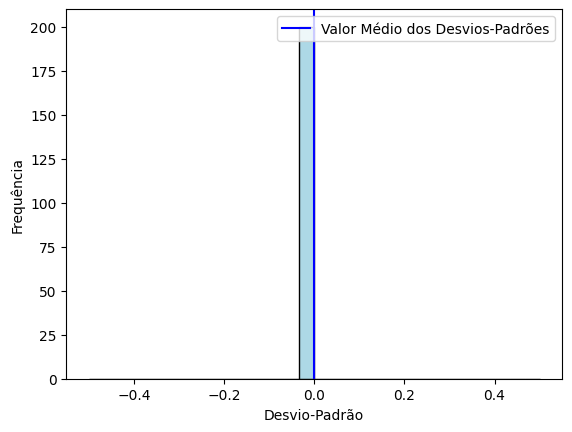

In [57]:
plt.hist(rec2[:,2], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Desvio-Padrão')
plt.ylabel('Frequência')
plt.axvline(x = rec2[:,2].mean(), color = 'b', label = 'Valor Médio dos Desvios-Padrões')
plt.legend()

print(f'Desvio Mínimo = {rec2[:,2].min()}')
print(f'Desvio Máximo = {rec2[:,2].max()}')
print(f'Desvio Médio = {rec2[:,2].mean()}')

Ora, esse gráfico nos informa que o desvio padrão é constante ao longo de toda a curva e é extremamente pequeno, na faixa de $10^{-14}$. Isso é mais um reflexo do viés imposto ao utilizar $\mu = H_{\Lambda CDM}$.

<div id="rec3" />

### Reconstruindo utilizando $\mu = 0$ e marginalizando os hiperparâmetros

Nessa abordagem, antes de reconstruir precisamos marginalizar os hiperparêmtros.

Para marginalizar os hiperparâmetros iremos utilizar Monte Carlo-Markov Chain (MCMC). Para isso, vamos usar o pacote *emcee*. Essa marginalização é complexa o suficiente pra ter uma seção própria.

<div id="mcmc1" />

#### MCMC

Como citado no referencial teórico acima, marginalizar os hiperparâmetros nada mais é do que explorar a função de verossimilhança. Por questões de eficiência computacional, utilizaremos o logaritmo dessa função,

$$
 ln \ p(y|\mathbf{X}, \sigma_{f}, l) = 
                -\frac{1}{2}(y-\mu)^{T}[K(\mathbf{X}, \mathbf{X})+C]^{-1} (y-\mu)-\frac{1}{2}ln \ [K(\mathbf{X}, \mathbf{X})+C] - \frac{n}{2} \ ln \ 2\pi.
$$

Em um primeiro momento essa expressão pode assustar, mas se olharmos com calma vemos que ela basicamente é uma expressão da função de covariância $\mathbf{K}$, das observações $y$ e da função média definida inicialmente, $\mu$. Aqui conseguimos ver que o valor dessa função e, consequentemente, os hiperparâmetros da reconstrução, dependem do valor inicial definido para $\mu$. Por isso vale a pena explorar diferentes valores para função média.

Nosso trabalho agora é implementar essa função e o processo de MCMC em Python. Inicialmente vou implementar os passos do processo individualmente, mas depois vamos encapsular em uma classe.

In [16]:
def ln_likelihood(params: List[float], z: List[float], Dvec: List[float], error: List[float], mean: callable) -> float:
    Chi2T = 0.
    sigma, l = params

    Dvecdif = Dvec*0.0
    Dvecdif = Dvec-mean(z)
    
    mbvectot = Dvecdif
    mbvectotT = mbvectot.T

    covariance_matrix = sigma**2 * np.exp(-0.5 * (z[:, None] - z[None, :])**2 / l**2)
    covariance_matrix += np.diag(error**2)
    Icov = np.linalg.inv(covariance_matrix)

    Chi2T=(mbvectot.dot(Icov)).dot(mbvectotT)

    try:
        cho_factor = np.linalg.cholesky(covariance_matrix)
    except np.linalg.LinAlgError:
        return -np.inf
    
    return -0.5 * Chi2T - np.sum(np.log(np.diagonal(cho_factor)))-float(len(z))/2.*(np.log(2.*3.1415926))

Agora precisamos definir as funções de probabilidade *a priori* e *a posteriori*. Como estamos trabalhando com logaritmo na função de verossimilhança, vamos fazer isso nessas funções também.

In [17]:
def ln_prior(params: List[float]) -> float:
    sigma, l = params
    if 0.0 < sigma < 500 and 0.0 < l < 5:
        return 0.0
    return -np.inf

def ln_posterior(params: List[float], z: List[float], Dvec: List[float], error: List[float]) -> float:
    lp = ln_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ln_likelihood(params, z, Dvec, error, zero)

A função *ln_prior* representa matematicamente o logaritmo da probabilidade *a priori*, $ln \ P_{prior}$. Essa probabilidade representa, basicamente, o conhecimento prévio que temos antes de observar os dados. Em resumo, se $\sigma \in (0,10)$ e $l \in (0,5)$ então os parâmetros fornecidos são plausíveis e, por isso, retornamos a probabilidade máxima.

Você pode estranhar que a função retorna 0 em caso positivo, aqui vale ressaltar que estamos atuando com logaritmo, então

$$
ln \ P_{prior} = 0 \Rightarrow P_{prior} = 1
$$

e

$$
ln \ P_{prior} = -\infty \Rightarrow P_{prior} = 0.
$$

Já a função *ln_posterior* é a combinação entre a probabilidade *a priori* e a função de verossimilhança. Então, $ln \ P_{posterior} = ln \ P_{prior} + ln \ p(y|\mathbf{X}, \sigma_{f}, l)$ ou, de outra forma, $P_{posterior} = P_{prior} \times p(y|\mathbf{X}, \sigma_{f}, l)$.

Por último, os intervalos $\sigma \in (0,10)$ e $l \in (0,5)$ foram definidos baseados em aspectos técnicos de cosmologia.

Agora vamos definir alguns *ansatz*. Os valores iniciais de $\sigma$ e $l$, a quantidade de cadeias (caminhantes) e o número de passos.

In [18]:
initial_params = [1.0, 1.0]

n_walkers = 50

n_steps = 1000

Então, inicializamos as cadeias adicionando uma pequena aleatóriedade no vetor de parâmetros iniciais

In [19]:
pos = initial_params + 1e-4 * np.random.randn(n_walkers, len(initial_params))

Finalmente rodamos o MCMC

In [20]:
sampler = emcee.EnsembleSampler(n_walkers, len(initial_params), ln_posterior, args=(z, Dvec, error))
sampler.run_mcmc(pos, n_steps)

State([[340.99820229   3.94542887]
 [105.62596653   1.7767056 ]
 [156.36292355   1.94994985]
 [293.6434265    3.78795213]
 [323.32655907   2.66816689]
 [451.20261677   3.50452202]
 [403.54648507   3.36862134]
 [285.67228419   4.13026665]
 [138.42300156   2.37705396]
 [119.01572107   4.06181661]
 [225.77473799   2.19840872]
 [343.47215447   2.74348766]
 [337.22293674   4.66002529]
 [100.93582396   2.39223309]
 [ 95.82701746   0.95820271]
 [107.99222671   1.23172881]
 [394.69829222   4.9239731 ]
 [163.48584314   3.98048705]
 [375.13535312   2.1145354 ]
 [250.98445389   3.48542207]
 [252.42320746   2.6212229 ]
 [219.21976092   2.25506069]
 [318.26417253   2.79509126]
 [238.48569698   4.35694338]
 [486.72684198   3.85296769]
 [440.03373328   4.10710959]
 [261.98636536   4.83244572]
 [244.37492691   1.76331405]
 [404.17658537   2.47743054]
 [175.23127962   1.78655926]
 [246.82295304   2.35356615]
 [252.35909317   2.64396223]
 [126.82088078   2.56020497]
 [161.28606566   2.17704995]
 [185.55

Então obtemos as cadeias de amostras

In [21]:
samples = sampler.get_chain(discard=100, thin = 15, flat=True)

Vimos todo o processamento para realizar o MCMC. Agora, é recomendado encapsular tudo isso em uma classe. Abaixo está a classe MCMC.

In [23]:
class MCMC:
    def __init__(self, data, mean, l_range, sigma_range, initial_params, n_walkers, n_steps):
        try:
            self.z, self.Hz, self.error = data[:, 0], data[:, 1], data[:, 2]
            self.mean = mean
            self.l_min, self.l_max = l_range
            self.sigma_min, self.sigma_max = sigma_range
            self.initial_params = initial_params
            self.n_walkers = n_walkers
            self.n_steps = n_steps
            self.Dvec = self.make_vector(self.z, self.Hz)
        except Exception as e:
            print('A Classe não foi inicializada corretamente: ', e)

    def make_vector(self, dim: List[float], vec_inicial: List[float]) -> List[float]:
        vec=np.zeros([1,len(dim)],dtype=np.float32)
        for a in range(len(dim)):
            vec[0,a]=vec_inicial[a]
        return vec

    def ln_likelihood(self, params: List[float], z: List[float], Dvec: List[float], error: List[float], mean: callable) -> float:
        Chi2T = 0.
        sigma, l = params
    
        Dvecdif = Dvec*0.0
        Dvecdif = Dvec-mean(z)
        
        mbvectot = Dvecdif
        mbvectotT = mbvectot.T
    
        covariance_matrix = sigma**2 * np.exp(-0.5 * (z[:, None] - z[None, :])**2 / l**2)
        covariance_matrix += np.diag(error**2)
        Icov = np.linalg.inv(covariance_matrix)
    
        Chi2T=(mbvectot.dot(Icov)).dot(mbvectotT)
    
        try:
            cho_factor = np.linalg.cholesky(covariance_matrix)
        except np.linalg.LinAlgError:
            return -np.inf
        
        return -0.5 * Chi2T - np.sum(np.log(np.diagonal(cho_factor)))-float(len(z))/2.*(np.log(2.*3.1415926))

    def ln_prior(self, params: List[float]) -> float:
        sigma, l = params
        if self.sigma_min < sigma < self.sigma_max and self.l_min < l < self.l_max:
            return 0.0
        return -np.inf

    def ln_posterior(self, params: List[float], z: List[float], Dvec: List[float], error: List[float]) -> float:
        lp = self.ln_prior(params)
        if not np.isfinite(lp):
            return -np.inf
        return lp + self.ln_likelihood(params, z, Dvec, error, self.mean)

    def initialize_chain(self) -> None:
        self.pos = self.initial_params + 1e-4 * np.random.randn(self.n_walkers, len(self.initial_params))

    def execute(self) -> None:
        self.sampler = emcee.EnsembleSampler(self.n_walkers, len(self.initial_params), self.ln_posterior, args=(self.z, self.Dvec, self.error))
        self.sampler.run_mcmc(self.pos, self.n_steps)

    def get_chains(self) -> List[List[float]]:
        return self.sampler.get_chain(discard=100, thin = 15, flat=True)

Executando o processo anterior, agora utilizando a classe, vimos que ao encapsular o processo o código fica mais limpo, compreensível e reutilizável.

Removed 0.4 as burn in


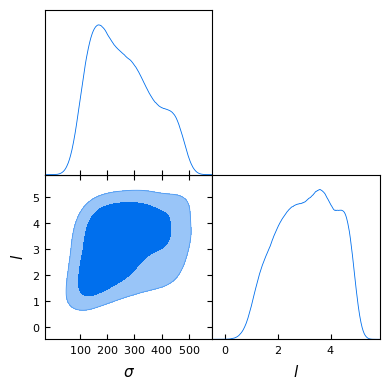

In [24]:
mcmc = MCMC(np.loadtxt("inputdata.txt"), zero, (0,5), (0,500), [1.0, 1.0], 50, 1000)
mcmc.initialize_chain()
mcmc.execute()
samples = mcmc.get_chains()

plot_triangle(samples)

O que observamos nessas cadeias de hiperparâmetros é que $\sigma$ é um hiperparâmetro *vinculado*. Isso significa que $\sigma$ tem um valor médio bem definido e que se utilizarmos valores muito distantes dessa média nossa reconstrução vai "sentir" alguns efeitos. Por outro lado, o hiperparâmetro $l$ é menos vinculado. Vemos que ele tem uma distribuição aproximadamente uniforme, então variar o valor de $l$ afeta pouco o resultado final do processo.

Agora que temos as cadeias de amostra dos hiperparâmetros, podemos reconstruir a função.

<div id="final_rec1" />

#### Reconstrução

A reconstrução aqui vai ser um pouco diferente. O que iremos fazer?

1. Escolher, aleatoriamente, 100 pontos das cadeias de hiperparâmetros;
2. A partir desses pontos, realizar 100 reconstruções;
3. Para cada redshift, de cada reconstrução, geraremos uma distribuição normal de 1000 pontos com média $H(z)$ e desvio-padrão $erroHz$;
* Exemplo, para o redshift 0 da primeira reconstrução, $z_{0, rec 1}$, geraremos uma normal, $z_{0, rec 1} \sim \mathcal{N}(H(z_{0, rec 1}), \sigma_{H(z)})$, 
5. Concatena-se as distribuições para os redshifts iguais;
  * Por exemplo, concatena-se todas as distribuições de redshifts 0 de todas as reconstruções, $z_{0, final}$ = concatenate($z_{0, rec 1}$, $z_{0, rec 2}$, ..., $z_{0, rec 100}$)
6. Extrai a média e o desvio-padrão dessa distribuição final para cada redshift e essa é a reconstrução para este redshift.

Igual ao processo anterior, aqui vamos implementar a reconstrução passo-a-passo e depois vamos encapsulá-la em uma classe.

In [25]:
def generate_random_samples(chain: np.ndarray, n: int) -> np.ndarray:
    try:
        if len(chain) < n:
            print("O array original não contém a quantidade mínima de amostras desejada.")
            return np.array([])

        random_indices = np.random.choice(len(chain), n, replace=False)
        random_samples = chain[random_indices]
        return random_samples

    except Exception as e:
        print(f"Ocorreu um erro: {e}")
        return np.array([])


In [26]:
n_samples = 100 
random_hyperparameters = generate_random_samples(samples, n_samples)

In [27]:
recs = []

g = dgp.DGaussianProcess(X, Y, Sigma, cXstar=(xmin, xmax, nstars), mu=zero)

for i in range(n_samples):
    sigma, l = random_hyperparameters[i]

    initheta = [sigma, l]

    (rec, theta) = g.gp(theta=initheta, thetatrain='False')

    recs.append(rec)

Pra facilitar nossa vida, vamos transformar essa Lista de Listas de Listas em um Dataframe.


In [28]:
df = pd.DataFrame()

for list in recs:
    df_temp = pd.DataFrame(list, columns=['z', 'Hz', 'erroHz'])
    print(df_temp)
    df = pd.concat([df, df_temp])

df.reset_index(drop=True, inplace=True)

display(df)

            z          Hz     erroHz
0    0.000000   64.521786   4.020542
1    0.012563   65.165607   3.883109
2    0.025126   65.812785   3.749663
3    0.037688   66.463297   3.620343
4    0.050251   67.117122   3.495300
..        ...         ...        ...
195  2.449749  209.989279  24.465996
196  2.462312  210.564276  24.771707
197  2.474874  211.134732  25.079172
198  2.487437  211.700612  25.388376
199  2.500000  212.261882  25.699302

[200 rows x 3 columns]
            z          Hz     erroHz
0    0.000000   67.888972   4.950591
1    0.012563   68.311870   4.731648
2    0.025126   68.742660   4.519623
3    0.037688   69.181332   4.314710
4    0.050251   69.627871   4.117133
..        ...         ...        ...
195  2.449749  224.520078  37.777609
196  2.462312  225.127667  38.382686
197  2.474874  225.727205  38.993275
198  2.487437  226.318630  39.609358
199  2.500000  226.901879  40.230919

[200 rows x 3 columns]
            z          Hz     erroHz
0    0.000000   65.013649  

,z,Hz,erroHz
0,0.000000,64.521786,4.020542
1,0.012563,65.165607,3.883109
2,0.025126,65.812785,3.749663
3,0.037688,66.463297,3.620343
4,0.050251,67.117122,3.495300
...,...,...,...
19995,2.449749,155.304279,66.714433
19996,2.462312,154.432757,67.961221
19997,2.474874,153.546543,69.215617
19998,2.487437,152.645960,70.477390


Agora vamos fazer o trabalho de gerar as Gaussianas para cada $z$, de cada reconstrução, e extrair a média e o desvio-padrão

In [29]:
redshifts = df['z'].unique()
n = 1000
rec: List[List[float]] = []

for z in redshifts:
    df_filtered = df[df['z'] == z]

    mean = []
    deviation = []

    for _, row in df_filtered.iterrows():
        Hz = row['Hz']
        erroHz = row['erroHz']

        normal = np.random.normal(loc=Hz, scale=erroHz, size=n)

        mean_ = np.mean(normal)
        deviation_ = np.std(normal)

        mean.append(mean_)
        deviation.append(deviation_)

    mean_Hz = np.mean(mean)
    deviation_Hz = np.mean(deviation)

    rec.append([z, mean_Hz, deviation_Hz])


Vamos encapsular todos esses passos em uma classe

In [33]:
class Reconstruct:
    def __init__(self, samples, n_samples, mean, data, params):
        try:
            self.samples = samples
            self.n_samples = n_samples
            self.mean = mean
            self.xmin, self.xmax, self.nstars, self.gaussian_points = params
            (self.X, self.Y, self.Sigma) = data
            self.random_hyperparameters = self.generate_random_samples(self.samples, self.n_samples)
        except Exception as e:
            print('A Classe não foi inicializada corretamente: ', e)

    def generate_random_samples(self, chain: np.ndarray, n: int) -> np.ndarray:
        try:
            if len(chain) < n:
                print("O array original não contém a quantidade mínima de amostras desejada.")
                return np.array([])

            random_indices = np.random.choice(len(chain), n, replace=False)
            random_samples = chain[random_indices]
            return random_samples

        except Exception as e:
            print(f"Ocorreu um erro: {e}")
            return np.array([])

    def rec(self) -> List[List[float]]:
        recs = []

        g = dgp.DGaussianProcess(self.X, self.Y, self.Sigma, cXstar=(self.xmin, self.xmax, self.nstars), mu=self.mean)

        for i in range(self.n_samples):
            sigma, l = self.random_hyperparameters[i]

            initheta = [sigma, l]

            (rec, theta) = g.gp(theta=initheta, thetatrain='False')

            recs.append(rec)
        return recs
        
    def make_df(self, recs) -> pd.DataFrame:
        df = pd.DataFrame()

        for rec_list in recs:
            df_temp = pd.DataFrame(rec_list, columns=['z', 'Hz', 'erroHz'])
            print(df_temp)
            df = pd.concat([df, df_temp])
        
        df.reset_index(drop=True, inplace=True)
        
        return df

    def final_rec(self, df) -> List[List[float]]:
        redshifts = df['z'].unique()
        
        n = self.gaussian_points
        
        rec: List[List[float]] = []

        for z in redshifts:
            df_filtered = df[df['z'] == z]

            mean = []
            deviation = []

            for _, row in df_filtered.iterrows():
                Hz = row['Hz']
                erroHz = row['erroHz']

                normal = np.random.normal(loc=Hz, scale=erroHz, size=n)

                mean_ = np.mean(normal)
                deviation_ = np.std(normal)

                mean.append(mean_)
                deviation.append(deviation_)

            mean_Hz = np.mean(mean)
            deviation_Hz = np.mean(deviation)

            rec.append([z, mean_Hz, deviation_Hz])
        
        return rec

    def execute(self) ->  List[List[float]]:
        recs = self.rec()
        df = self.make_df(recs)
        final_rec = self.final_rec(df)

        return final_rec

In [34]:
rec = Reconstruct(samples, 100, zero, loadtxt("./inputdata.txt", unpack='True'), (0, 2.5, 200, 1000))
final_rec = rec.execute()

r_squared = calculate_r_squared((X,Y), np.array(final_rec))

            z          Hz     erroHz
0    0.000000   65.376928   4.299312
1    0.012563   65.967995   4.138678
2    0.025126   66.563197   3.982719
3    0.037688   67.162519   3.831601
4    0.050251   67.765946   3.685506
..        ...         ...        ...
195  2.449749  223.505662  28.226469
196  2.462312  224.290923  28.605395
197  2.474874  225.073091  28.986826
198  2.487437  225.852127  29.370750
199  2.500000  226.627989  29.757154

[200 rows x 3 columns]
            z          Hz     erroHz
0    0.000000   63.864748   3.767319
1    0.012563   64.555322   3.651474
2    0.025126   65.248098   3.538953
3    0.037688   65.943058   3.429861
4    0.050251   66.640181   3.324310
..        ...         ...        ...
195  2.449749  209.716797  21.681736
196  2.462312  210.343994  21.942190
197  2.474874  210.968134  22.204252
198  2.487437  211.589193  22.467912
199  2.500000  212.207147  22.733159

[200 rows x 3 columns]
            z          Hz     erroHz
0    0.000000   65.244472  

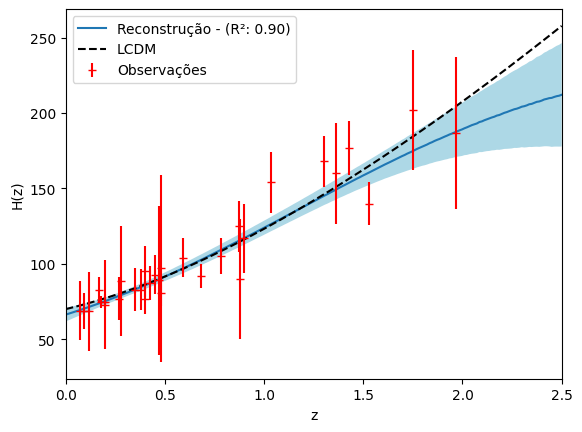

In [35]:
plot(X, Y, Sigma, np.array(final_rec), r_squared, title="plot1.png")

Desvio Mínimo = 2.210300083379425
Desvio Máximo = 34.312766457364745
Desvio Médio = 10.072422181932058


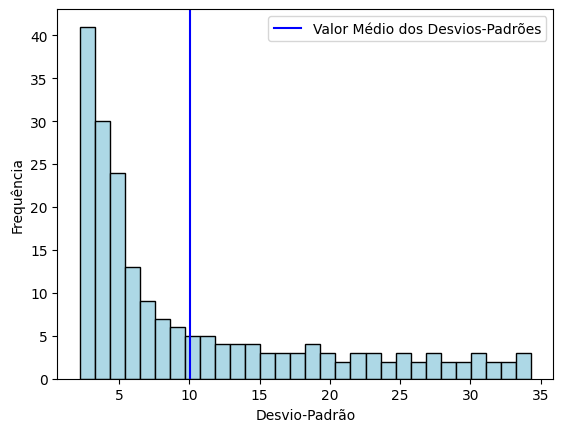

In [86]:
erros = [rec[2] for rec in final_rec]

plt.hist(erros, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Desvio-Padrão')
plt.ylabel('Frequência')
plt.axvline(x = np.mean(erros), color = 'b', label = 'Valor Médio dos Desvios-Padrões')
plt.legend()

print(f'Desvio Mínimo = {min(erros)}')
print(f'Desvio Máximo = {max(erros)}')
print(f'Desvio Médio = {np.mean(erros)}')

Aqui vemos que o desvio está entre 2.2 e 34, tendo um valor médio de 10. Temos valores ligeiramente menores em comparação a abordagem utilizando otimização.

<div id="rec4" />

### Reconstruindo utilizando $\mu = H_{\Lambda CDM}$ e marginalizando os hiperparâmetros

<div id="mcmc2" />

### MCMC

Graças as classes criadas antes, o processo é mais simples agora.

Removed 0.4 as burn in


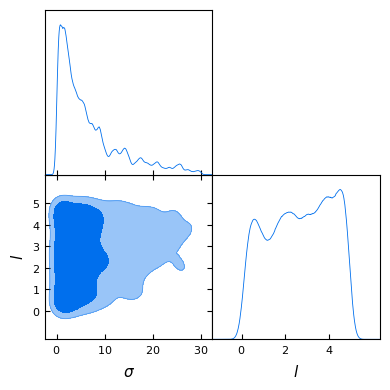

In [36]:
mcmc2 = MCMC(np.loadtxt("inputdata.txt"), lambda_cdm, (0,5), (0,30), [1.0, 1.0], 50, 1000)
mcmc2.initialize_chain()
mcmc2.execute()
samples2 = mcmc2.get_chains()

plot_triangle(samples2)

Novamente vemos que $\sigma$ é um hiperparâmetro extremamente vinculado. E, novamente, $l$ tem uma distribuição aproximadamente uniforme, ou seja, é pouco vinculado.

<div id="final_rec2"/>

### Reconstrução

In [39]:
rec3 = Reconstruct(samples2, 100, lambda_cdm, loadtxt("./inputdata.txt", unpack='True'), (0, 2.5, 200, 1000))
final_rec3 = rec3.execute()

r_squared = calculate_r_squared((X,Y), np.array(final_rec3))

            z          Hz    erroHz
0    0.000000   68.867222  1.907425
1    0.012563   69.266871  1.904073
2    0.025126   69.674237  1.900825
3    0.037688   70.089311  1.897680
4    0.050251   70.512082  1.894639
..        ...         ...       ...
195  2.449749  251.733189  2.857245
196  2.462312  253.042638  2.865389
197  2.474874  254.354844  2.873519
198  2.487437  255.669798  2.881634
199  2.500000  256.987493  2.889734

[200 rows x 3 columns]
            z          Hz    erroHz
0    0.000000   69.305725  1.463684
1    0.012563   69.705216  1.463334
2    0.025126   70.112411  1.462996
3    0.037688   70.527301  1.462668
4    0.050251   70.949874  1.462352
..        ...         ...       ...
195  2.449749  251.936537  1.592445
196  2.462312  253.244148  1.593854
197  2.474874  254.554516  1.595266
198  2.487437  255.867631  1.596682
199  2.500000  257.183485  1.598102

[200 rows x 3 columns]
            z          Hz    erroHz
0    0.000000   68.589451  2.359303
1    0.012563   

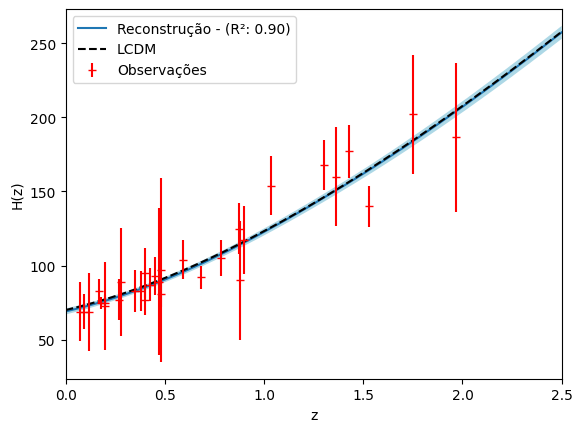

In [40]:
plot(X, Y, Sigma, np.array(final_rec3), r_squared, title="plot1.png")

Vemos novamente o viés imposto pelo modelo padrão. Porém aqui percebemos que a reconstrução apresenta um desvio-médio um pouco maior graças a marginalização.

Desvio Mínimo = 1.7433634944509446
Desvio Máximo = 4.35896632422387
Desvio Médio = 2.7690320839782587


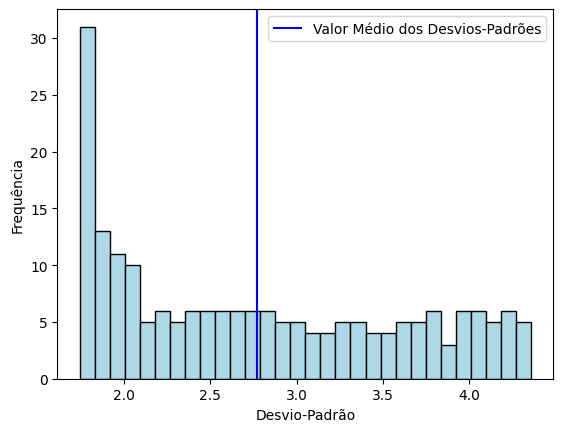

In [87]:
erros = [rec[2] for rec in final_rec3]

plt.hist(erros, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Desvio-Padrão')
plt.ylabel('Frequência')
plt.axvline(x = np.mean(erros), color = 'b', label = 'Valor Médio dos Desvios-Padrões')
plt.legend()

print(f'Desvio Mínimo = {min(erros)}')
print(f'Desvio Máximo = {max(erros)}')
print(f'Desvio Médio = {np.mean(erros)}')

Vemos que, diferente da outra abordagem com $\mu = 0$, essa regressão apresenta um desvio que vai de 1.7 até 4.35 e apresenta um valor médio de 2.8.

<div id="conclusao" />

### Conclusão

Em resumo, conseguimos observar que ao utilizar o modelo cosmológico como função média *prior*, introduzimos um grande viés no resultado final da regressão. Ao fazer isso, o Processo Gaussiano deixa de se adaptar somente aos dados e passa a ser influenciado pelo modelo $\Lambda CDM$. Porém, vale ressaltar que nem sempre isso acontece, como mostra [Hwang, 2023].

Além disso observamos que ao marginalizar os hiperparêmetros, temos uma reconstrução mais justa uma vez que pegamos 100 valores aleatórios das cadeias dos hiperparâmetros. É perceptível, principalmente no caso $\mu = H_{\Lambda CDM}$, que marginalizar os hiperparâmetros aumenta os desvios-padrões ao longo da regressão.

Como visto aqui, escolher a função média *prior* e selecionar os hiperparâmetros influenciam diretamente no resultado final da regressão. É preciso, então, entender muito bem o problema a ser abordado.